*Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.*

Data: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data

# 0.0 Imports and functions

In [401]:
import pandas   as  pd
import numpy    as  np
import seaborn  as  sns
import sweetviz as  sv

from matplotlib import  pyplot  as  plt
from ipywidgets import  HTML

from ydata_profiling    import  ProfileReport

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model    as lm

In [402]:
# Changing the plt layout
def jupyter_settings():
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

# Call the function 
jupyter_settings()

## 0.1 Read csv

In [403]:
# Read csv
df_train    =   pd.read_csv('./dataset/train.csv')

In [404]:
# Print csv
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data description

In [405]:
df1 = df_train.copy()  # Created a copy of the original DataFrame

# Perform the cleaning on the column names.
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')

## 1.1 Columns

In [406]:
# Print columns
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2 Data dimension

In [407]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


## 1.3 Data types

In [408]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4 Column description

**id int64** =>  "Unique ID for the customer"

**gender object** =>  "Male and Female"

**age int64** =>  "Age 20-85"

**driving_license int64** =>  "Driving_License 0 : Customer does not have DL, 1 : Customer already has DL"

**region_code float64** =>  "Unique code for the region of the customer"

**previously_insured int64** =>  "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance"

**vehicle_age object** =>  "Age of the Vehicle"

**vehicle_damage object** =>  "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past."

**annual_premium float64** =>  "The amount customer needs to pay as premium in the year"
-- The monthly amount is paid per year

**policy_sales_channel float64** =>  "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc."

**vintage int64** =>  "Number of Days, Customer has been associated with the company"

**response int64** =>  "	1 : Customer is interested, 0 : Customer is not interested"

## 1.5 Questions

**id int64** =>  "Unique ID for the customer"
- No questions found for "id"

**gender object** =>  "Male and Female"
- Women take more care of their health
- Male has more car
- Male has more *driving_license*
- Male has more *previously_insured*

**age int64** =>  "Age 20-85"
- The older the more interested
- The older the driving_license
- The older the previously_insured
- The older the more annual_premium 

**driving_license int64** =>  "Driving_License 0 : Customer does not have DL, 1 : Customer already has DL"
- The customer who already has a DL, has previously_insured
- The customer who already has a DL, has vehicle_damage

**region_code float64** =>  "Unique code for the region of the customer"


**previously_insured int64** =>  "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance"
- previously_insured is a vehicle_age, vehicle_damage

**vehicle_age object** =>  "Age of the Vehicle"
- Idade do veiculo, quanto mais velho possivelmente já tenha seguro e não vai ter interesse

**vehicle_damage object** =>  "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past."
- Se teve algum dano no carro, possivelmente tem interesse pois foi caro o valor de pagamento

**annual_premium float64** =>  "The amount customer needs to pay as premium in the year" -- The monthly amount is paid per year
- Se paga mais, tem mais dinheiro. Possivelmente vai querer o seguro se gostar da empresa

**policy_sales_channel float64** =>  "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc."
- Codigo de canal de divulgação

**vintage int64** =>  "Number of Days, Customer has been associated with the company"
- Quanto mais tempo associado, mas provavemente aceitar

**response int64** =>  "	1 : Customer is interested, 0 : Customer is not interested"
- 1 Interessado
- 0 Desinteressado

# 2.0 Feature Engineering

In [409]:
df2 = df1.copy()

## 2.1 Feature Engineering

In [410]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [411]:
df2['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [412]:
# Female    =   0
# Male      =   1
df2['gender']           =   df2['gender'].map({'Female': 0, 'Male': 1})

# Menos de 1 ano    =   0
# Entre 1 e 2 anos  =   1
# Mais de 2 anos    =   2
df2['vehicle_age']      =   df2['vehicle_age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

# Yes   =   1
# No    =   0
df2['vehicle_damage']   =   df2['vehicle_damage'].map({'No': 0, 'Yes': 1})

In [413]:
len(df2['annual_premium'].unique()), len(df2)

(48838, 381109)

In [414]:
# # Analisando se tem outliers => Acredito que não, o valor paga mais alto em um convenio é mesmo uma opção para poucos.
# len(df2[df2['annual_premium'] > 350000]['annual_premium'].unique()), len(df2[df2['annual_premium'] > 350000])

In [415]:
# sorted(df2[df2['annual_premium'] > 90000]['annual_premium'].unique(), reverse=True)
# # sorted(df2[df2['annual_premium'] > 80000]['annual_premium'].unique())

# # 540165
# # 55177

In [416]:
# my_report = sv.analyze(df2)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [417]:
# profile = ProfileReport(df2, title="Profiling Report")
# profile

## 2.2 Target field analysis 1 or 0

In [418]:
df2_response_1 = df2[df2['response'] == 1]
df2_response_0 = df2[df2['response'] == 0]

In [419]:
df2[['response', 'driving_license']].groupby('driving_license').count()
df2['driving_license'].unique()
# sorted(df2['driving_license'].unique())

array([1, 0], dtype=int64)

In [420]:
df2_response_1.describe()
#   "gender"                =>  Bem distribuido
#   "age"                   =>  Média maior
#   "driving_license"       =>  Bem distribuido
#   "region_code"           =>  Vamos ver sobre isso.
#   "previously_insured"    =>  Não tem seguro automovel


#   "vehicle_age"           =>  Tem mais volume no valor = 1 (Entre 1 e 2 anos)
#   "vehicle_damage"        =>  Tem mais volume no valor = 1 (Sim, teve o veiculo danificado)
#   "annual_premium"        =>  Parece estar muito bem destribuidos
#   "policy_sales_channel"  =>  Analisar os canais de comunicação, achar o melhor canal!
#   "vintage"               =>  Parece estar muito bem destribuidos

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.0
mean,190152.264504,0.610683,43.435560,0.999122,26.762963,0.003383,0.946478,0.978977,31604.092742,91.869086,154.112246,1.0
std,109797.768735,0.487601,12.168924,0.029614,11.785157,0.058062,0.501986,0.143464,18646.508040,56.015074,83.738574,0.0
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,1.0
25%,94677.750000,0.000000,35.000000,1.000000,21.000000,0.000000,1.000000,1.000000,24868.000000,26.000000,82.000000,1.0
50%,190495.500000,1.000000,43.000000,1.000000,28.000000,0.000000,1.000000,1.000000,33002.000000,124.000000,154.000000,1.0
75%,285272.250000,1.000000,51.000000,1.000000,30.000000,0.000000,1.000000,1.000000,41297.000000,136.000000,226.000000,1.0
max,381098.000000,1.000000,83.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.0


In [421]:
df2_response_0.describe()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.000000,334399.0
mean,190611.255476,0.530994,38.178227,0.997694,26.336544,0.521742,0.562561,0.438653,30419.160276,114.851040,154.380243,0.0
std,110047.448167,0.499039,15.816052,0.047962,13.418504,0.499528,0.560090,0.496223,16998.293197,53.342899,83.661975,0.0
min,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.0
25%,95378.500000,0.000000,24.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24351.000000,61.000000,82.000000,0.0
50%,190562.000000,1.000000,34.000000,1.000000,28.000000,1.000000,1.000000,0.000000,31504.000000,152.000000,154.000000,0.0
75%,285926.500000,1.000000,49.000000,1.000000,36.000000,1.000000,1.000000,1.000000,39120.000000,152.000000,227.000000,0.0
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,0.0


In [422]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


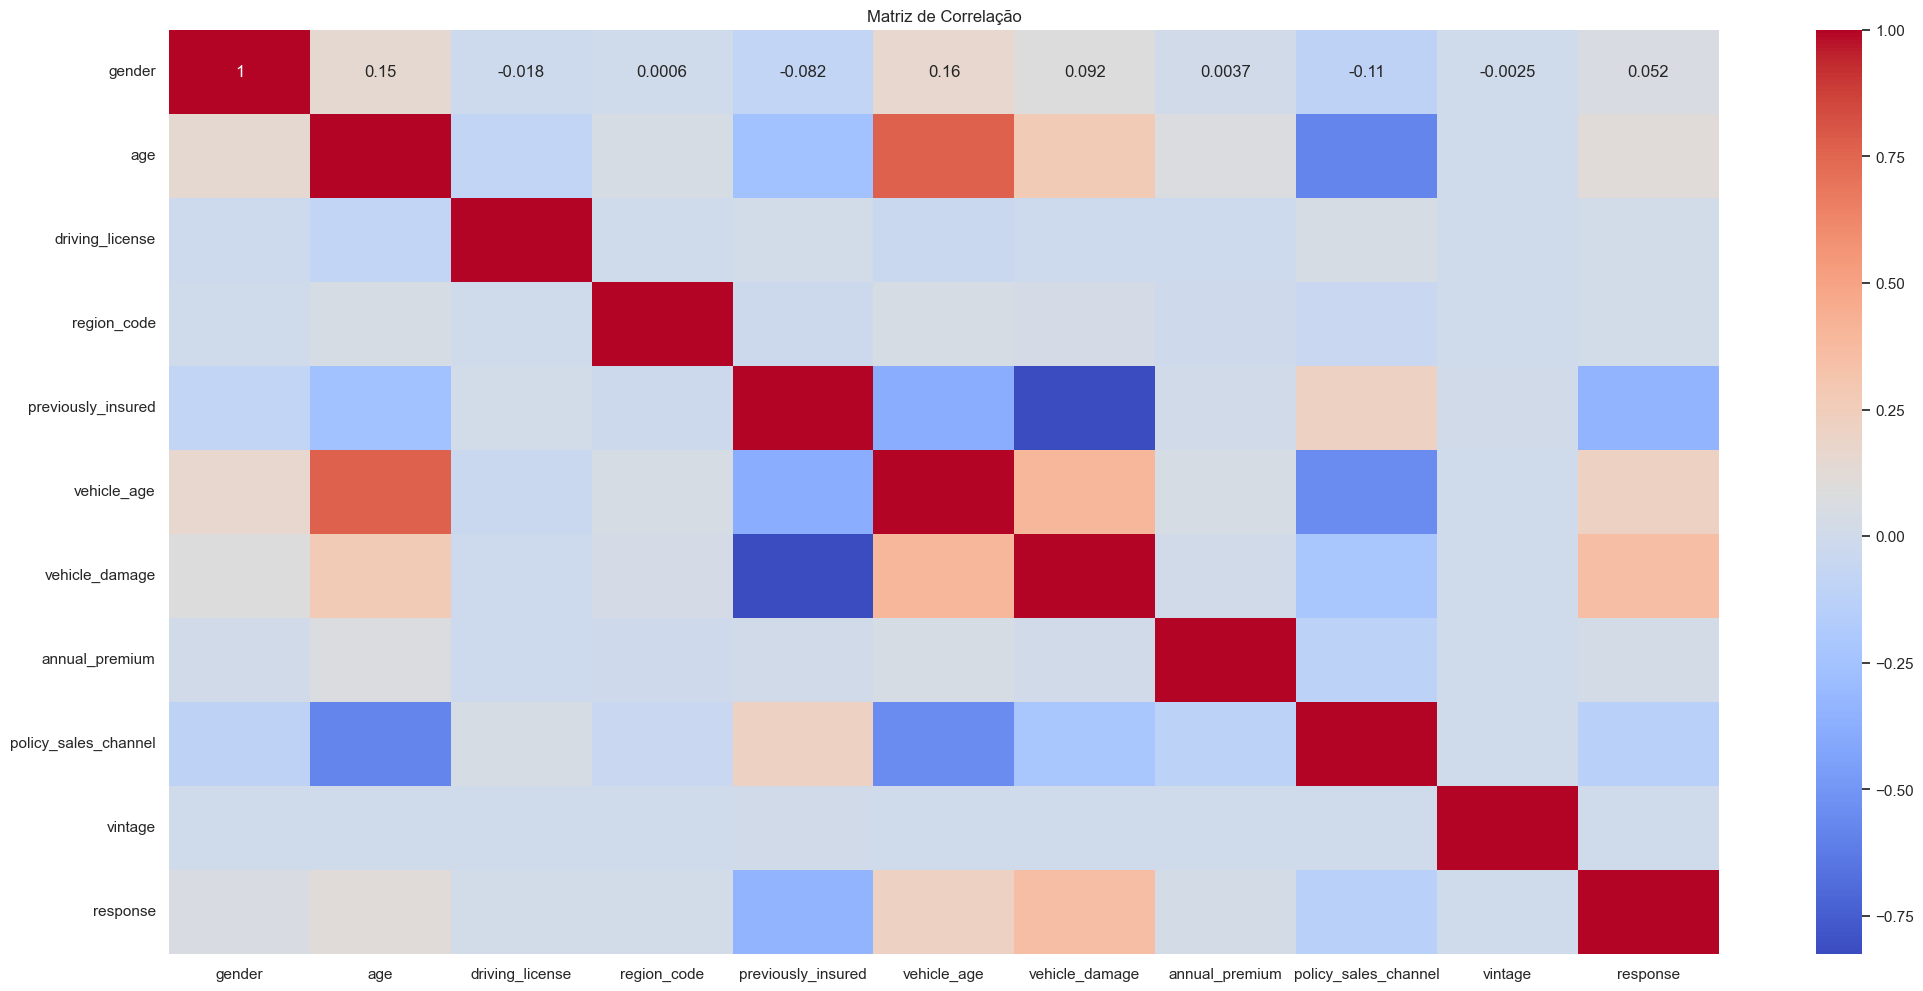

In [423]:
# Calcular a matriz de correlação
matriz_correlacao = df2.drop(columns=['id']).corr()
# matriz_correlacao

# Criar um gráfico de calor usando Seaborn
# sns.set(style="white")  # Estilo do gráfico
# plt.figure(figsize=(8, 6))  # Tamanho da figura
sns.heatmap(matriz_correlacao, cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

# 3.0. Data Filtering

In [424]:
df3 = df2.copy()

# 4.0. EDA

In [425]:
df4 = df3.copy()

In [426]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

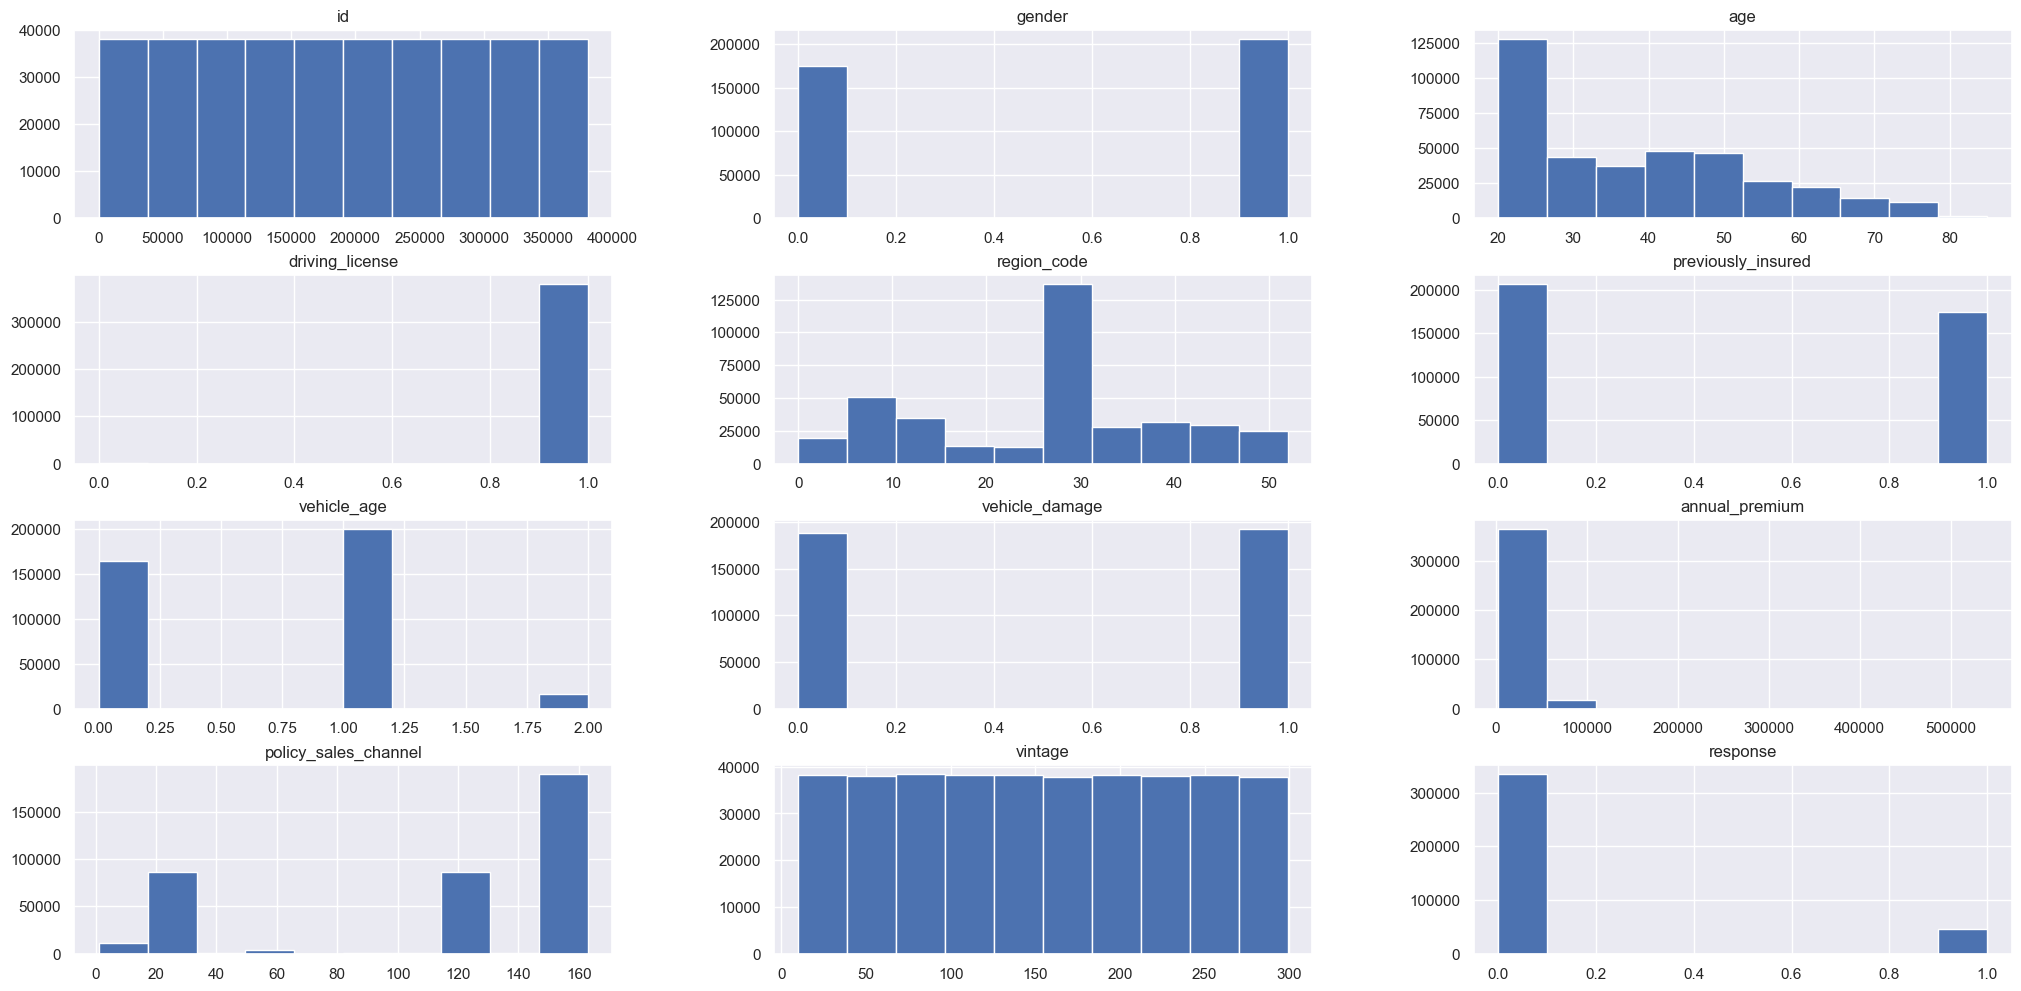

In [427]:
# sns.histplot( df4 )
df4.hist();

## 4.1 Column - Gender

**gender object** =>  "Male and Female"
- <p><span style="color: red">Women take more care of their health:</span> Tem mais homens</p>
- <p><span style="color: red">Male has more car:</span></p>
- <p><span style="color: red">Male has more *driving_license*:</span></p>
- <p><span style="color: red">Male has more *previously_insured*:</span></p>

In [428]:
# - Women take more care of their health
# - As mulheres cuidam mais da saúde
df4_gender              =   df4[['id', 'gender', 'response']].groupby(['gender', 'response']).count().reset_index()
df4_gender['gender']    =   df4_gender['gender'].map({0 : 'Female', 1 : 'Male'})
df4_gender['response']  =   df4_gender['response'].map({0 : 'Não', 1 : 'Sim'})

count_male                  =   df4_gender[df4_gender['gender'] == 'Male']['id'].sum()
count_female                =   df4_gender[df4_gender['gender'] == 'Female']['id'].sum()
df4_gender['gender_per']    =   df4_gender.apply( lambda x: (x['id'] / count_male) if x['gender'] == 'Male' else (x['id'] / count_female) , axis=True )
df4_gender['gender_per']    =   (df4_gender['gender_per'] * 100).round(2)

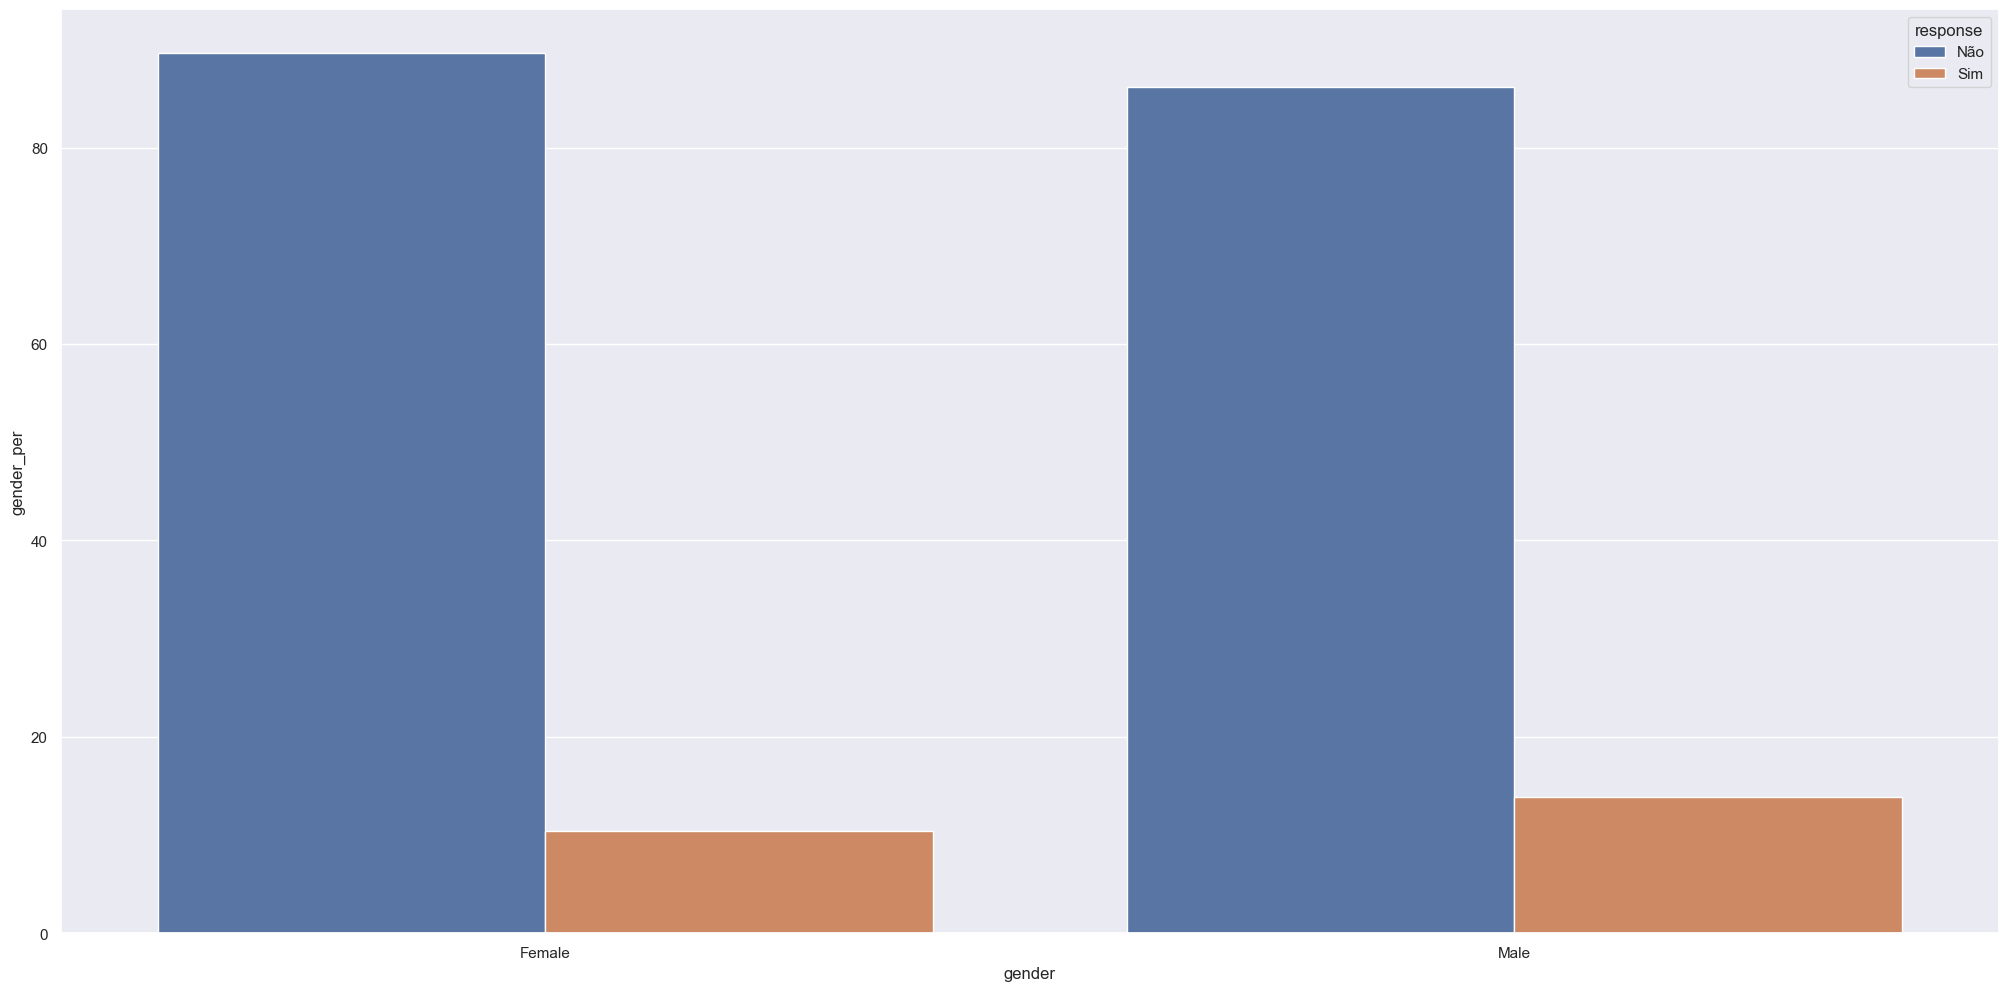

In [429]:
sns.barplot(data=df4_gender, x='gender', y='gender_per',  hue='response')
plt.show()

# df4_gender              =   df4.copy()
# df4_gender['gender']    =   df4_gender['gender'].map({0 : 'Female', 1 : 'Male'})
# df4_gender['response']  =   df4_gender['response'].map({0 : 'Não', 1 : 'Sim'})

# sns.displot(data=df4_gender, x="gender", hue="response", multiple="stack")

In [430]:
# - Male has more car
# - Homem tem mais carro
# vehicle_age - vehicle_damage	- driving_license - previously_insured
df4_gender_vehicle_age                      =   df4[['id', 'vehicle_age', 'driving_license', 'response']].groupby(['vehicle_age', 'driving_license', 'response']).count().reset_index()
df4_gender_vehicle_age['driving_license']   =   df4_gender_vehicle_age['driving_license'].map({0 : 'Não', 1 : 'Sim'})
df4_gender_vehicle_age['response']          =   df4_gender_vehicle_age['response'].map({0 : 'Não', 1 : 'Sim'})
df4_gender_vehicle_age
# df4.columns


# - Male has more *driving_license*
# - Homem tem mais *carteira_de_condução*




# - Male has more *previously_insured*
# - Homem tem mais *previously_insured*





,vehicle_age,driving_license,response,id
0,0,Não,Não,1
1,0,Sim,Não,157583
2,0,Sim,Sim,7202
3,1,Não,Não,719
4,1,Não,Sim,36
5,1,Sim,Não,164791
6,1,Sim,Sim,34770
7,2,Não,Não,51
8,2,Não,Sim,5
9,2,Sim,Não,11254


In [431]:
df4_gender_vehicle_age


,vehicle_age,driving_license,response,id
0,0,Não,Não,1
1,0,Sim,Não,157583
2,0,Sim,Sim,7202
3,1,Não,Não,719
4,1,Não,Sim,36
5,1,Sim,Não,164791
6,1,Sim,Sim,34770
7,2,Não,Não,51
8,2,Não,Sim,5
9,2,Sim,Não,11254


## 4.2 Column - age

In [432]:
# sorted(df4['age'].unique())
df4_age             =   df4[['id', 'age', 'response']].groupby(['age', 'response']).count().reset_index()
df4_age['response'] =   df4_age['response'].map({0 : 'Não', 1 : 'Sim'})
df4_age.columns     =   ['age', 'response', 'count']

In [433]:
# df4_age.head()

c:\xampp\htdocs\Meu\DS\MeusTeste\LearningRank\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\MeusTeste\LearningRank\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


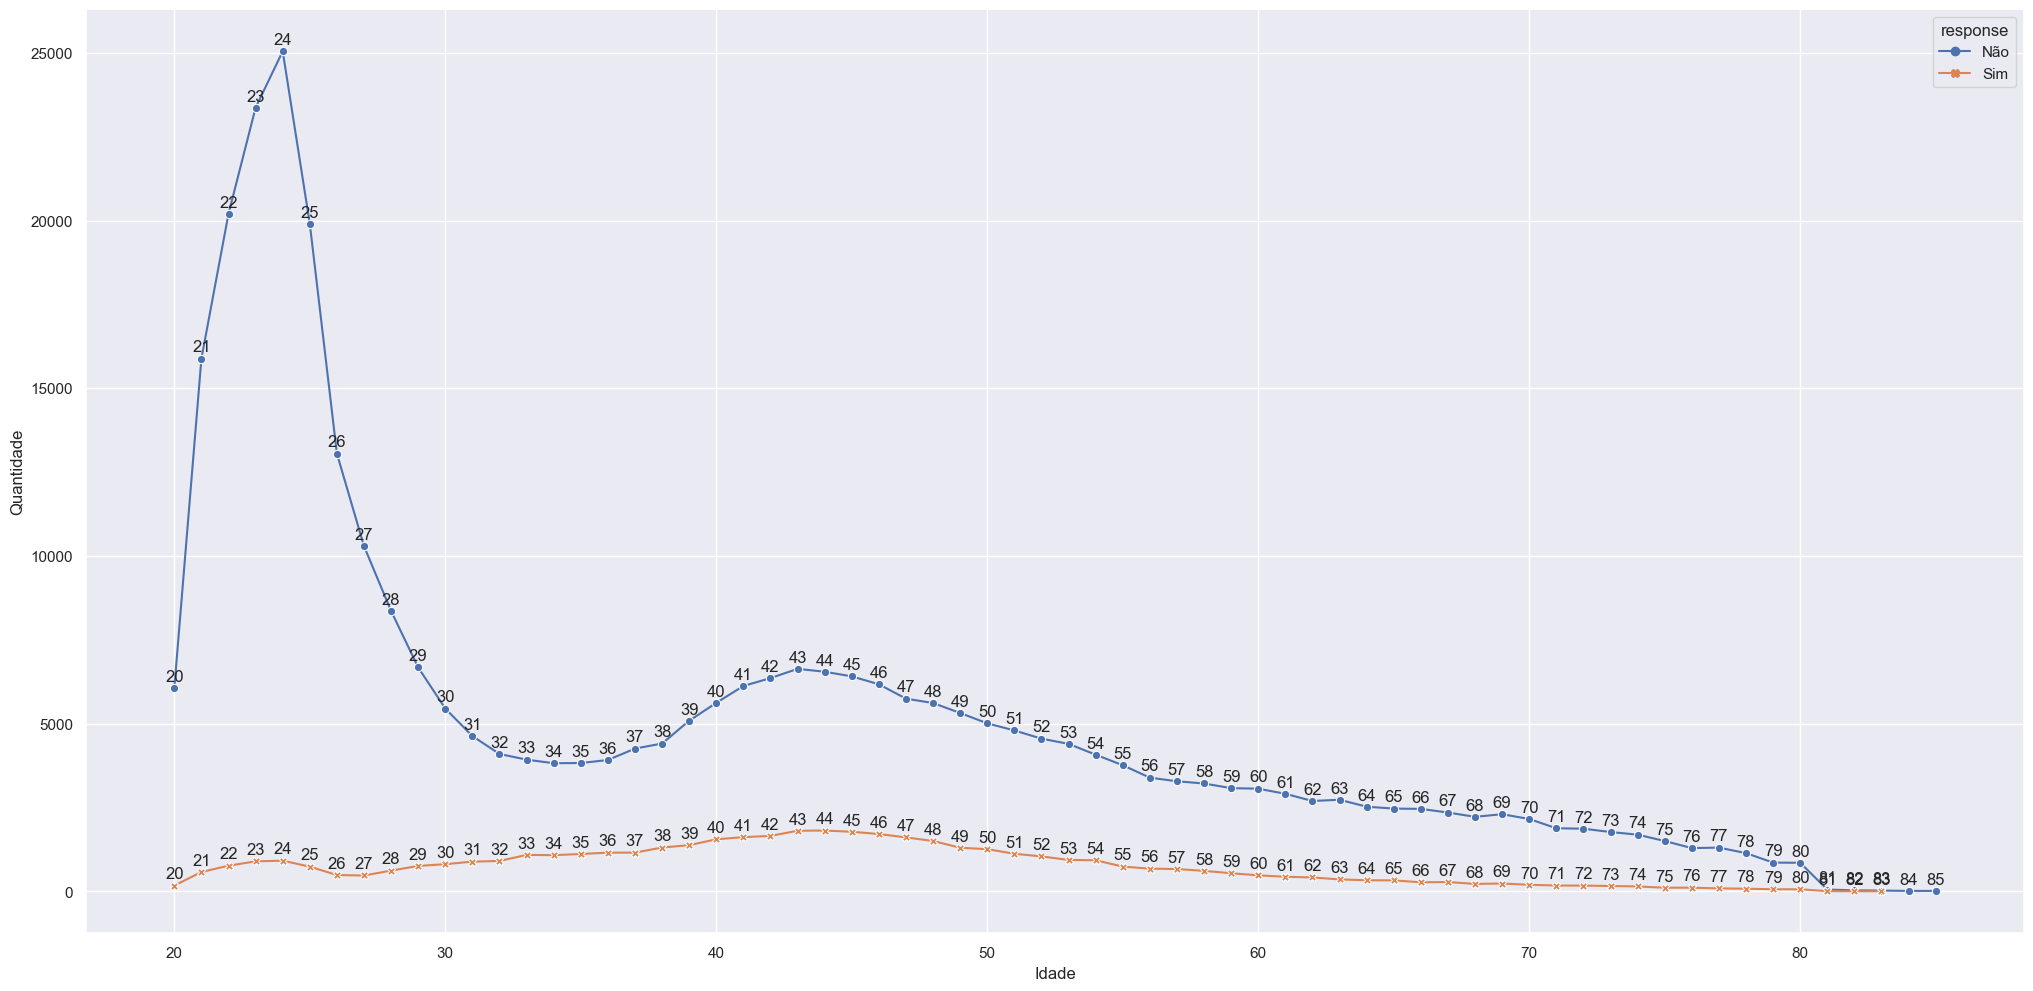

In [434]:
# Criar um gráfico de linha com rótulos para todos os pontos no eixo x
ax = sns.lineplot(data=df4_age, x="age", y="count", hue="response", style="response", markers=True, dashes=False)

# Adicionar rótulos a todos os pontos no eixo x
for x, y, label in zip(df4_age["age"], df4_age["count"], df4_age["age"]):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

# Adicionar rótulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()

## 4.3 Column - driving_license

In [435]:
df4_driving_license             =   df4[['id', 'driving_license', 'response']].groupby(['driving_license', 'response']).count().reset_index()
df4_driving_license.columns     =   ['driving_license', 'response', 'count']
df4_driving_license['response'] =   df4_driving_license['response'].map({0 : 'Não', 1 : 'Sim'})
df4_driving_license

,driving_license,response,count
0,0,Não,771
1,0,Sim,41
2,1,Não,333628
3,1,Sim,46669


## 4.4 Column - region_code

In [436]:
region_code             =   df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
region_code.columns     =   ['region_code', 'response', 'count']
region_code['response'] =   region_code['response'].map({0 : 'Não', 1 : 'Sim'})

In [437]:
region_code.head()

,region_code,response,count
0,0.0,Não,1847
1,0.0,Sim,174
2,1.0,Não,899
3,1.0,Sim,109
4,2.0,Não,3751


c:\xampp\htdocs\Meu\DS\MeusTeste\LearningRank\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\MeusTeste\LearningRank\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


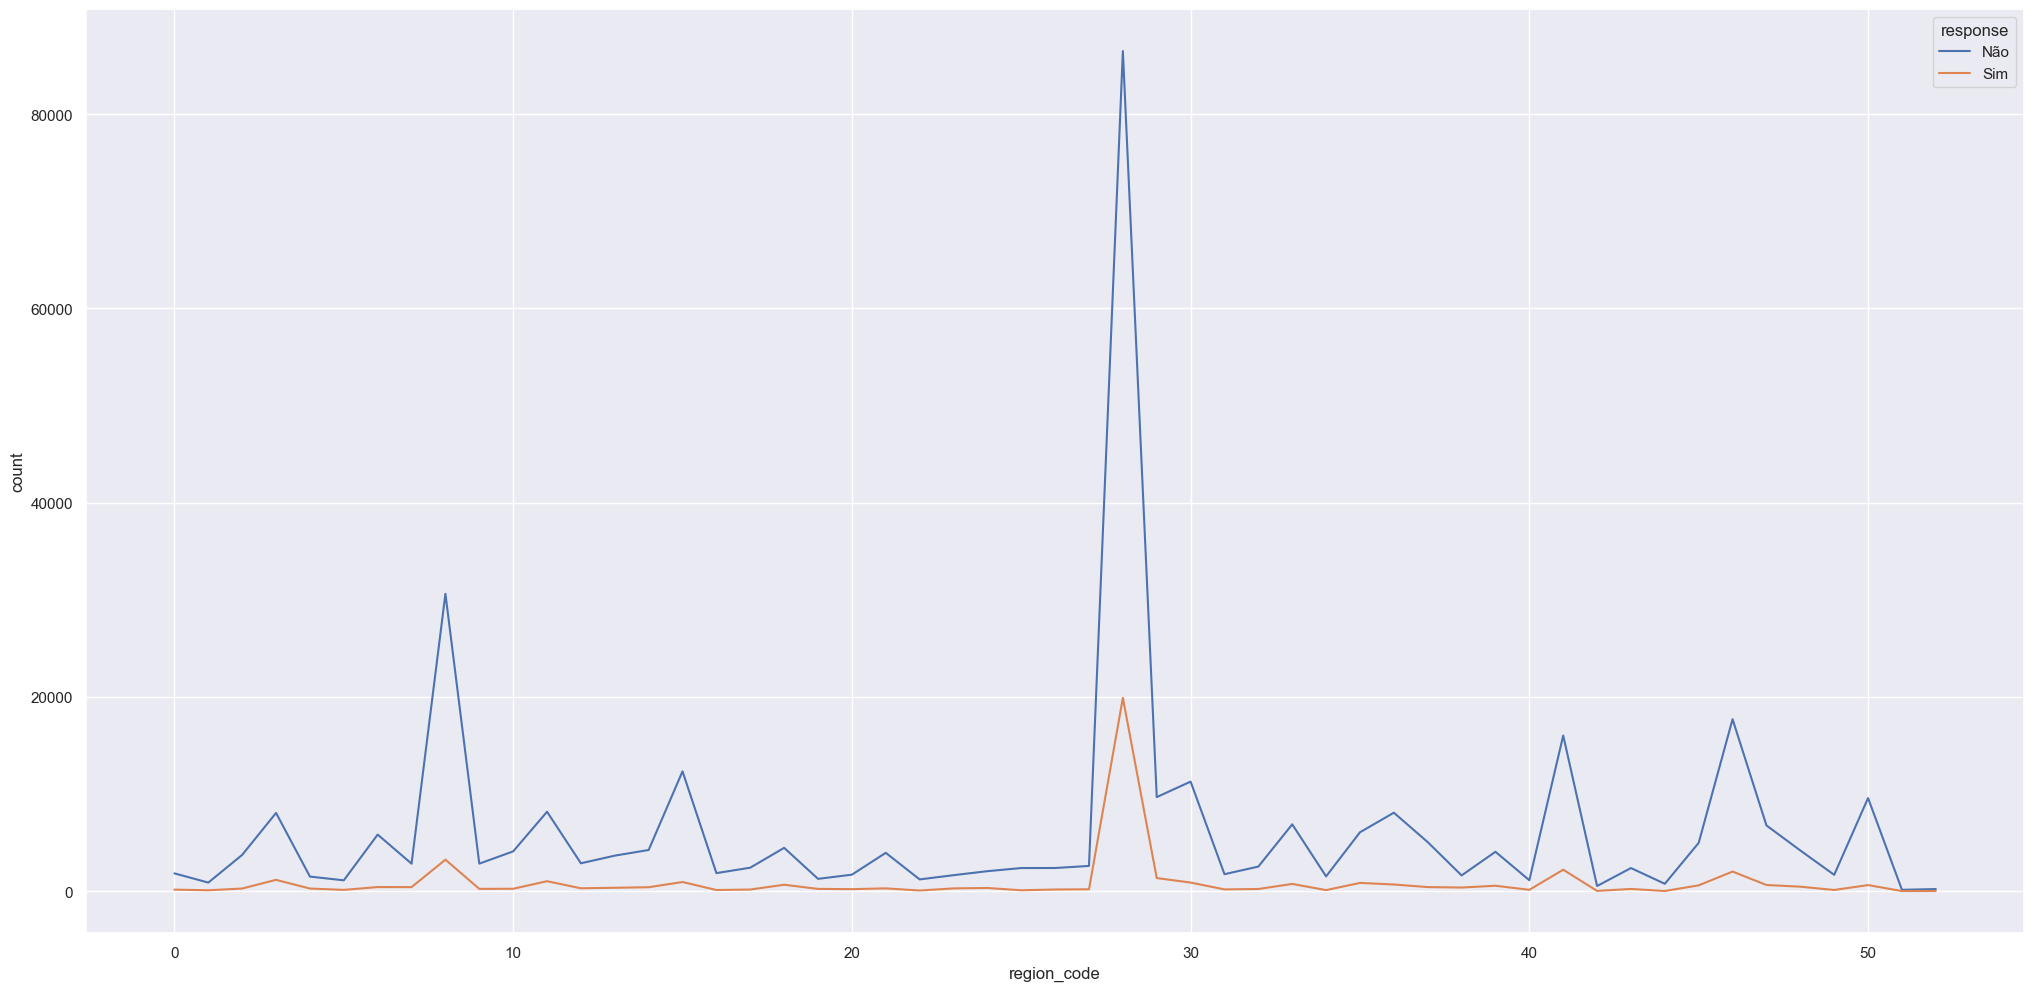

In [438]:
sns.lineplot(data=region_code, x="region_code", y="count", hue="response");

In [439]:
df_raw = region_code.groupby('region_code').sum().reset_index()

In [440]:
df_raw.head()

,region_code,response,count
0,0.0,NãoSim,2021
1,1.0,NãoSim,1008
2,2.0,NãoSim,4038
3,3.0,NãoSim,9251
4,4.0,NãoSim,1801


In [441]:
df_aux = pd.merge(region_code, df_raw, on='region_code', how='outer')
df_aux['count_per'] = (100 / df_aux['count_x'] * df_aux['count_y']).round(2)

In [442]:
df_aux = df_aux.sort_values('count_per', ascending=False)

In [443]:
df_aux.head()

,region_code,response_x,count_x,response_y,count_y,count_per
89,44.0,Sim,33,NãoSim,808,2448.48
51,25.0,Sim,107,NãoSim,2503,2339.25
21,10.0,Sim,263,NãoSim,4374,1663.12
101,50.0,Sim,642,NãoSim,10243,1595.48
45,22.0,Sim,83,NãoSim,1309,1577.11


## 4.5 Column - previously_insured

In [444]:
previously_insured             =   df4[['id', 'previously_insured', 'response']].groupby(['previously_insured', 'response']).count().reset_index()
previously_insured.columns     =   ['previously_insured', 'response', 'count']
previously_insured['response'] =   previously_insured['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.6 Column - vehicle_age

In [445]:
vehicle_age             =   df4[['id', 'vehicle_age', 'response']].groupby(['vehicle_age', 'response']).count().reset_index()
vehicle_age.columns     =   ['vehicle_age', 'response', 'count']
vehicle_age['response'] =   vehicle_age['response'].map({0 : 'Não', 1 : 'Sim'})

In [446]:
df_raw = vehicle_age.groupby('vehicle_age').sum().reset_index()
df_raw = pd.merge(vehicle_age, df_raw[['vehicle_age', 'count']], on='vehicle_age', how='inner')
# df_aux = pd.merge(df4_aux_response_sim, df4_aux_count_all, on='policy_sales_channel', how='inner')
# vehicle_age.head()
df_raw['count_per'] = (100 / df_raw['count_y'] * df_raw['count_x'])

In [447]:
# df_raw.sort_values('count_per')

## 4.7 Column - vehicle_damage

In [448]:
vehicle_damage             =   df4[['id', 'vehicle_damage', 'response']].groupby(['vehicle_damage', 'response']).count().reset_index()
vehicle_damage.columns     =   ['vehicle_damage', 'response', 'count']
vehicle_damage['response'] =   vehicle_damage['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.8 Column - annual_premium 

In [449]:
annual_premium             =   df4[['id', 'annual_premium', 'response']].groupby(['annual_premium', 'response']).count().reset_index()
annual_premium.columns     =   ['annual_premium', 'response', 'count']
annual_premium['response'] =   annual_premium['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.9 Column - policy_sales_channel

In [450]:
policy_sales_channel             =   df4[['id', 'policy_sales_channel', 'response']].groupby(['policy_sales_channel', 'response']).count().reset_index()
policy_sales_channel.columns     =   ['policy_sales_channel', 'response', 'count']
policy_sales_channel['response'] =   policy_sales_channel['response'].map({0 : 'Não', 1 : 'Sim'})
policy_sales_channel.head()

,policy_sales_channel,response,count
0,1.0,Não,1039
1,1.0,Sim,35
2,2.0,Não,3
3,2.0,Sim,1
4,3.0,Não,364


In [451]:
# policy_sales_channel['count'] = np.log(policy_sales_channel['count'])
# sns.lineplot(data= policy_sales_channel, x="policy_sales_channel", y="count", hue="response", marker="o");

In [452]:
df4_aux_count_all = policy_sales_channel[['count', 'policy_sales_channel']].groupby('policy_sales_channel').sum().reset_index()
df4_aux_count_all.head()

,policy_sales_channel,count
0,1.0,1074
1,2.0,4
2,3.0,523
3,4.0,509
4,6.0,3


In [453]:
policy_sales_channel['percentual'] = policy_sales_channel.groupby('policy_sales_channel')['count'].transform(lambda x: x / x.sum() * 100)
df4_aux_response_sim = policy_sales_channel[policy_sales_channel['response'] == 'Sim'].sort_values('percentual', ascending=False)

df_aux = pd.merge(df4_aux_response_sim, df4_aux_count_all, on='policy_sales_channel', how='inner')

In [454]:
df_aux = df_aux[df_aux['count_x'] != df_aux['count_y']].reset_index(drop=True)
df_aux.reset_index(inplace=True)
df_aux = df_aux[['index', 'policy_sales_channel']]

In [455]:
df_aux['index'] = df_aux['index'] + 1
df_aux.columns = ['policy_sales_channel_edited', 'policy_sales_channel']
df4_end = pd.merge(df4, df_aux, on='policy_sales_channel', how='outer')

In [456]:
df4_end.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,policy_sales_channel_edited
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,28.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,28.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,28.0
3,8,0,56,1,28.0,0,1,1,32031.0,26.0,72,1,28.0
4,32,1,79,1,28.0,0,1,1,57444.0,26.0,222,0,28.0


## 4.10 - vintage

In [457]:
vintage             =   df4[['id', 'vintage', 'response']].groupby(['vintage', 'response']).count().reset_index()
vintage.columns     =   ['vintage', 'response', 'count']
vintage['response'] =   vintage['response'].map({0 : 'Não', 1 : 'Sim'})

In [458]:
df_aux_vintage = vintage[['vintage', 'count']].groupby('vintage').sum().reset_index()

In [459]:
df_aux_vintage = pd.merge( df_aux_vintage, vintage, on='vintage', how='outer' )

In [460]:
df_aux_vintage['count_per'] = (100 / df_aux_vintage['count_x'] * df_aux_vintage['count_y']).round(2)

In [461]:
df_aux_vintage_sim = df_aux_vintage[df_aux_vintage['response'] == 'Sim']
df_aux_vintage_nao = df_aux_vintage[df_aux_vintage['response'] == 'Não']

In [462]:
df_aux_vintage = df_aux_vintage_sim.sort_values('count_per', ascending=False).reset_index(drop=True).reset_index()

In [463]:
df_aux_vintage = df_aux_vintage[['index', 'vintage']]
df_aux_vintage.columns = ['vintage_edited', 'vintage']

In [464]:
df4_end = pd.merge(df4_end, df_aux_vintage, on='vintage', how='outer')

In [465]:
df4_end[df4_end['policy_sales_channel_edited'].isna()]  =   0
df4_end[df4_end['policy_sales_channel_edited'] == 0]    =   max(df4_end['policy_sales_channel_edited']) + 1

## 4.11 - CORR

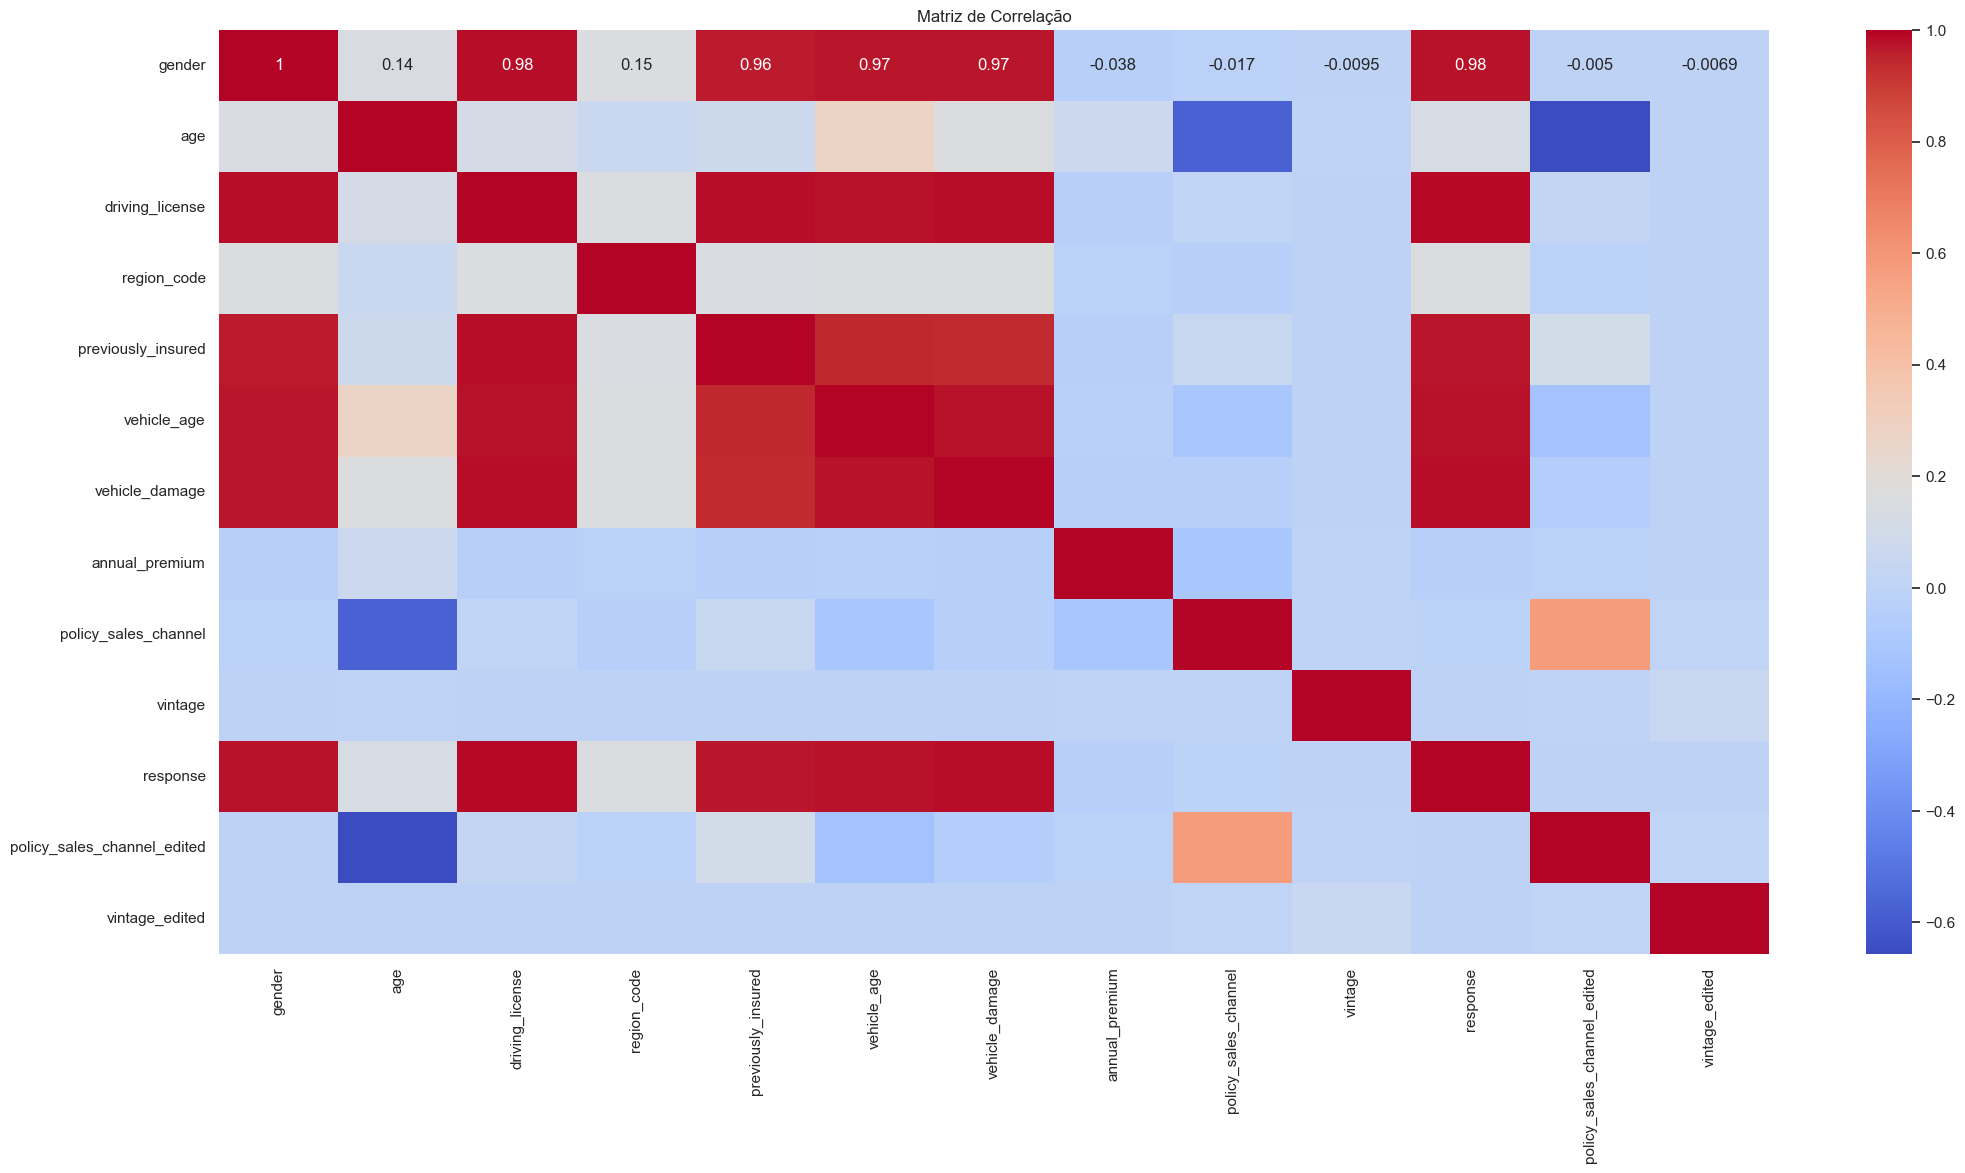

In [466]:
# Calcular a matriz de correlação
matriz_correlacao = df4_end.drop(columns=['id']).corr()
# matriz_correlacao

# Criar um gráfico de calor usando Seaborn
# sns.set(style="white")  # Estilo do gráfico
# plt.figure(figsize=(8, 6))  # Tamanho da figura
sns.heatmap(matriz_correlacao, cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

# 5.0. Data Preparation

In [467]:
df5 =   df4.copy()

In [468]:
ss  =   pp.StandardScaler()
mm  =   pp.MinMaxScaler()

In [469]:
# annual_premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

In [470]:
# Age
df5['age']      =    mm.fit_transform( df5[['age']].values )

# vintage
df5['vintage']  =    mm.fit_transform( df5[['vintage']].values )

In [471]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 ) 
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )


In [472]:
# df5.groupby( 'region_code' )['response'].mean()

# 6.0. Feature Selection

In [473]:
df6 =   df5.copy()

In [474]:
df6.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_0,vehicle_age_1,vehicle_age_2
0,1,0.138411,0.369231,1,0.187163,0,1,0.574539,0.209127,0.716263,1,False,False,True
1,2,0.138411,0.861538,1,0.127662,0,0,0.172636,0.209127,0.598616,0,False,True,False
2,3,0.138411,0.415385,1,0.187163,0,1,0.449053,0.209127,0.058824,1,False,False,True
3,4,0.138411,0.015385,1,0.112760,1,0,-0.113018,0.353663,0.667820,0,True,False,False
4,5,0.103902,0.138462,1,0.121776,1,0,-0.178259,0.353663,0.100346,0,True,False,False


In [475]:
df6.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_0,vehicle_age_1,vehicle_age_2
0,1,0.138411,0.369231,1,0.187163,0,1,0.574539,0.209127,0.716263,1,False,False,True
1,2,0.138411,0.861538,1,0.127662,0,0,0.172636,0.209127,0.598616,0,False,True,False
2,3,0.138411,0.415385,1,0.187163,0,1,0.449053,0.209127,0.058824,1,False,False,True
3,4,0.138411,0.015385,1,0.112760,1,0,-0.113018,0.353663,0.667820,0,True,False,False
4,5,0.103902,0.138462,1,0.121776,1,0,-0.178259,0.353663,0.100346,0,True,False,False


# 7.0. Machine Learning

In [476]:
from sklearn.model_selection    import train_test_split

import  xgboost     as  xgb
import  scikitplot  as  skplt

In [477]:
# df7 =   df2.copy()
df7 =   df6.copy()

In [478]:
# df7.drop(columns=['response', 'id']).head()

In [479]:
X_train, X_test, y_train, y_test = train_test_split(df7.drop(columns=['response', 'id']), df7['response'], test_size=0.2, random_state=42)

# cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured', 'policy_sales_channel', 'response']
# X_train, X_test, y_train, y_test = train_test_split(df7.drop(columns=['response']), df7['response'], test_size=0.2, random_state=42)



## 7.1 KNN

In [480]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( X_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( X_test )

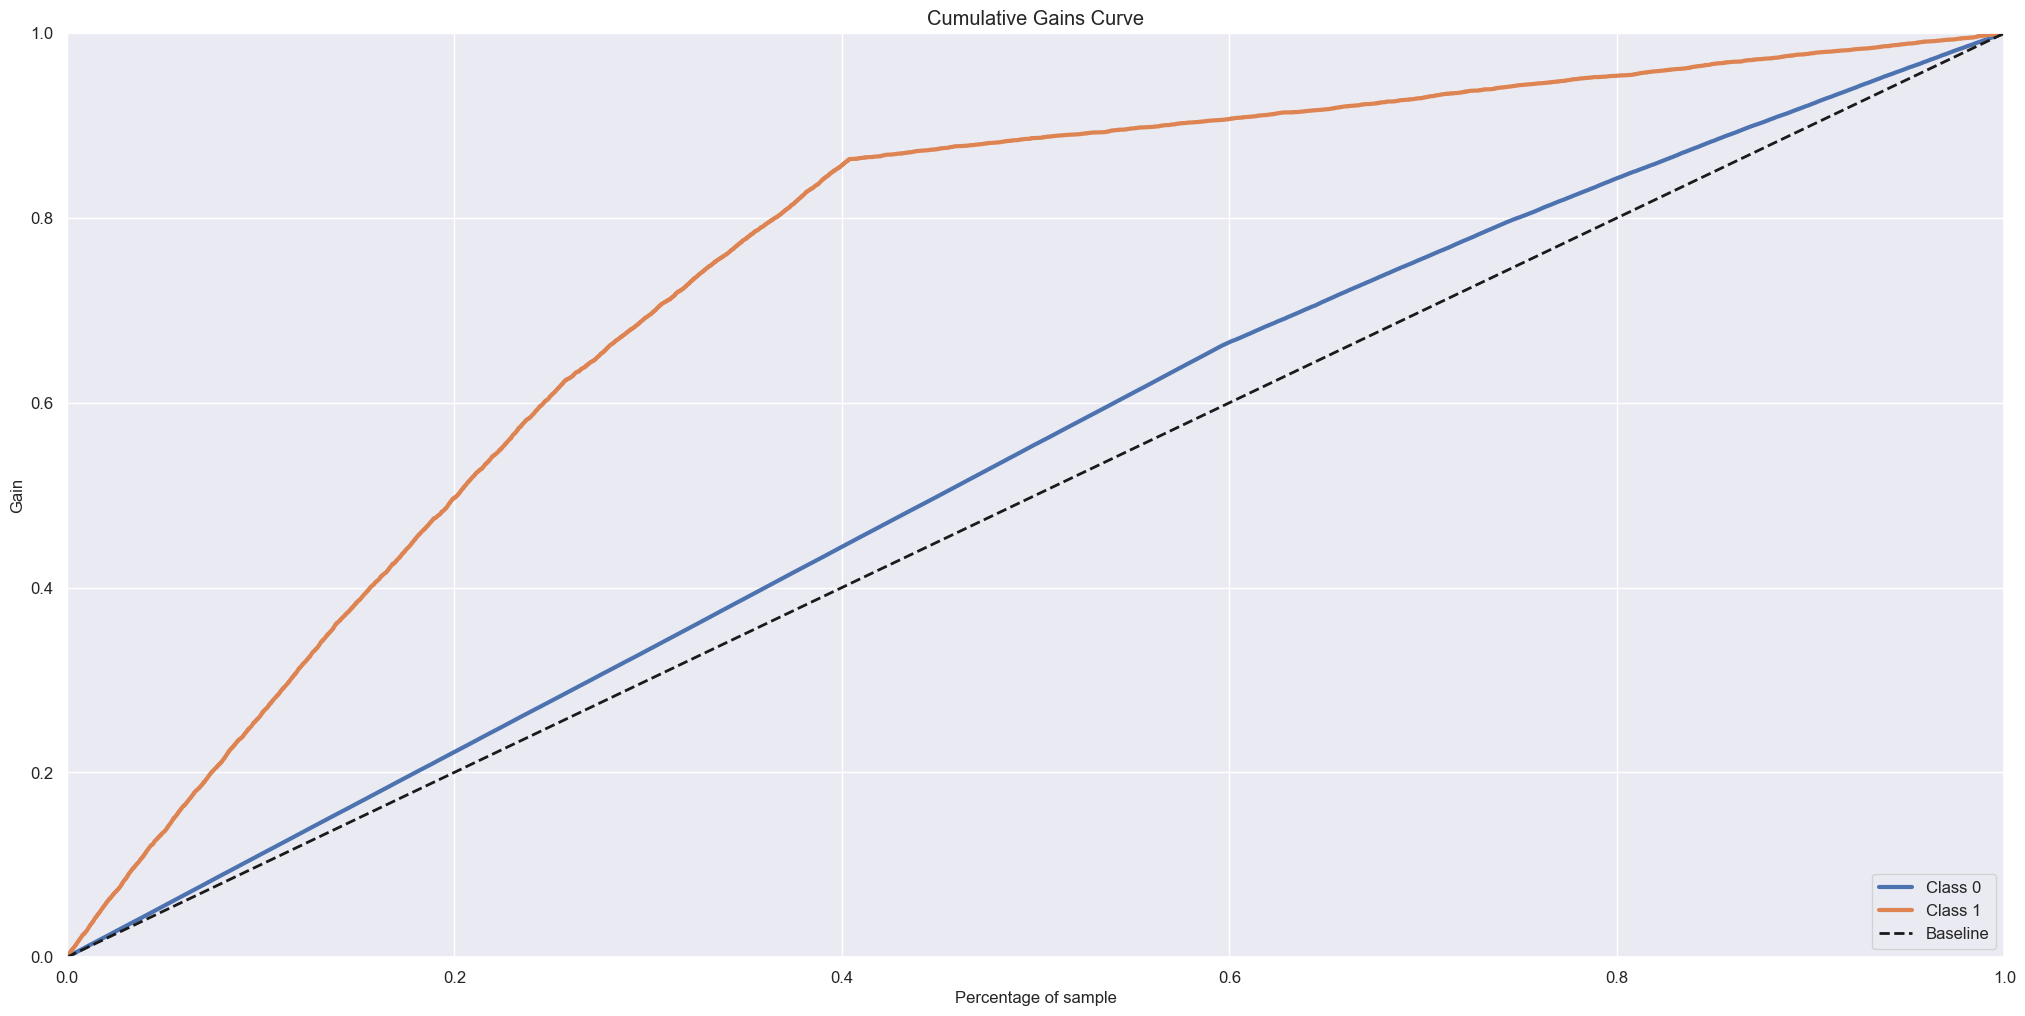

In [481]:
skplt.metrics.plot_cumulative_gain( y_test, yhat_knn );

## 7.2 XGBClassifier

In [482]:
# model = xgb.XGBRegressor(random_state=42)
model       =   xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [483]:
# Fazer previsões no conjunto de teste
yhat_xgb = model.predict_proba(X_test)

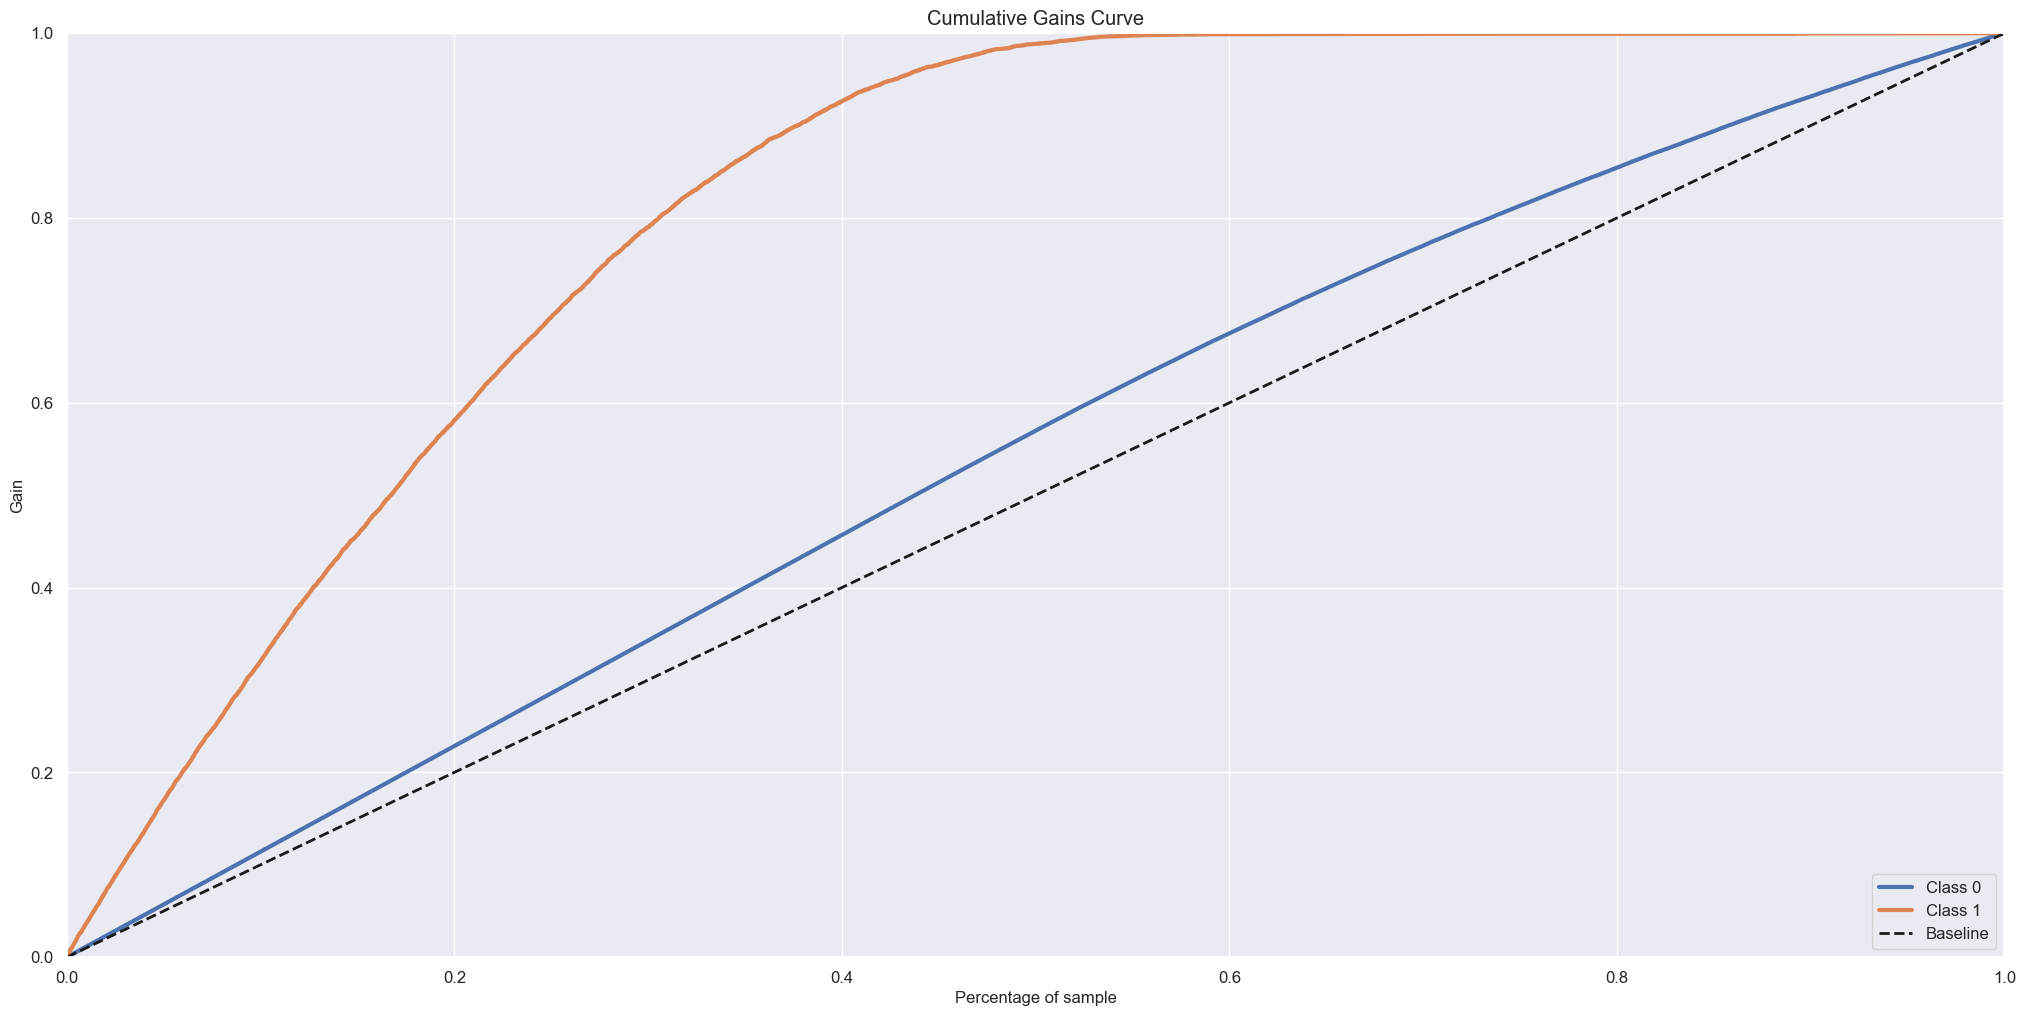

In [484]:
skplt.metrics.plot_cumulative_gain( y_test, yhat_xgb );

## 7.3 LogisticRegression

In [485]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 );

# model training
lr_model.fit( X_train, y_train );

# model prediction
yhat_lr = lr_model.predict_proba( X_test );

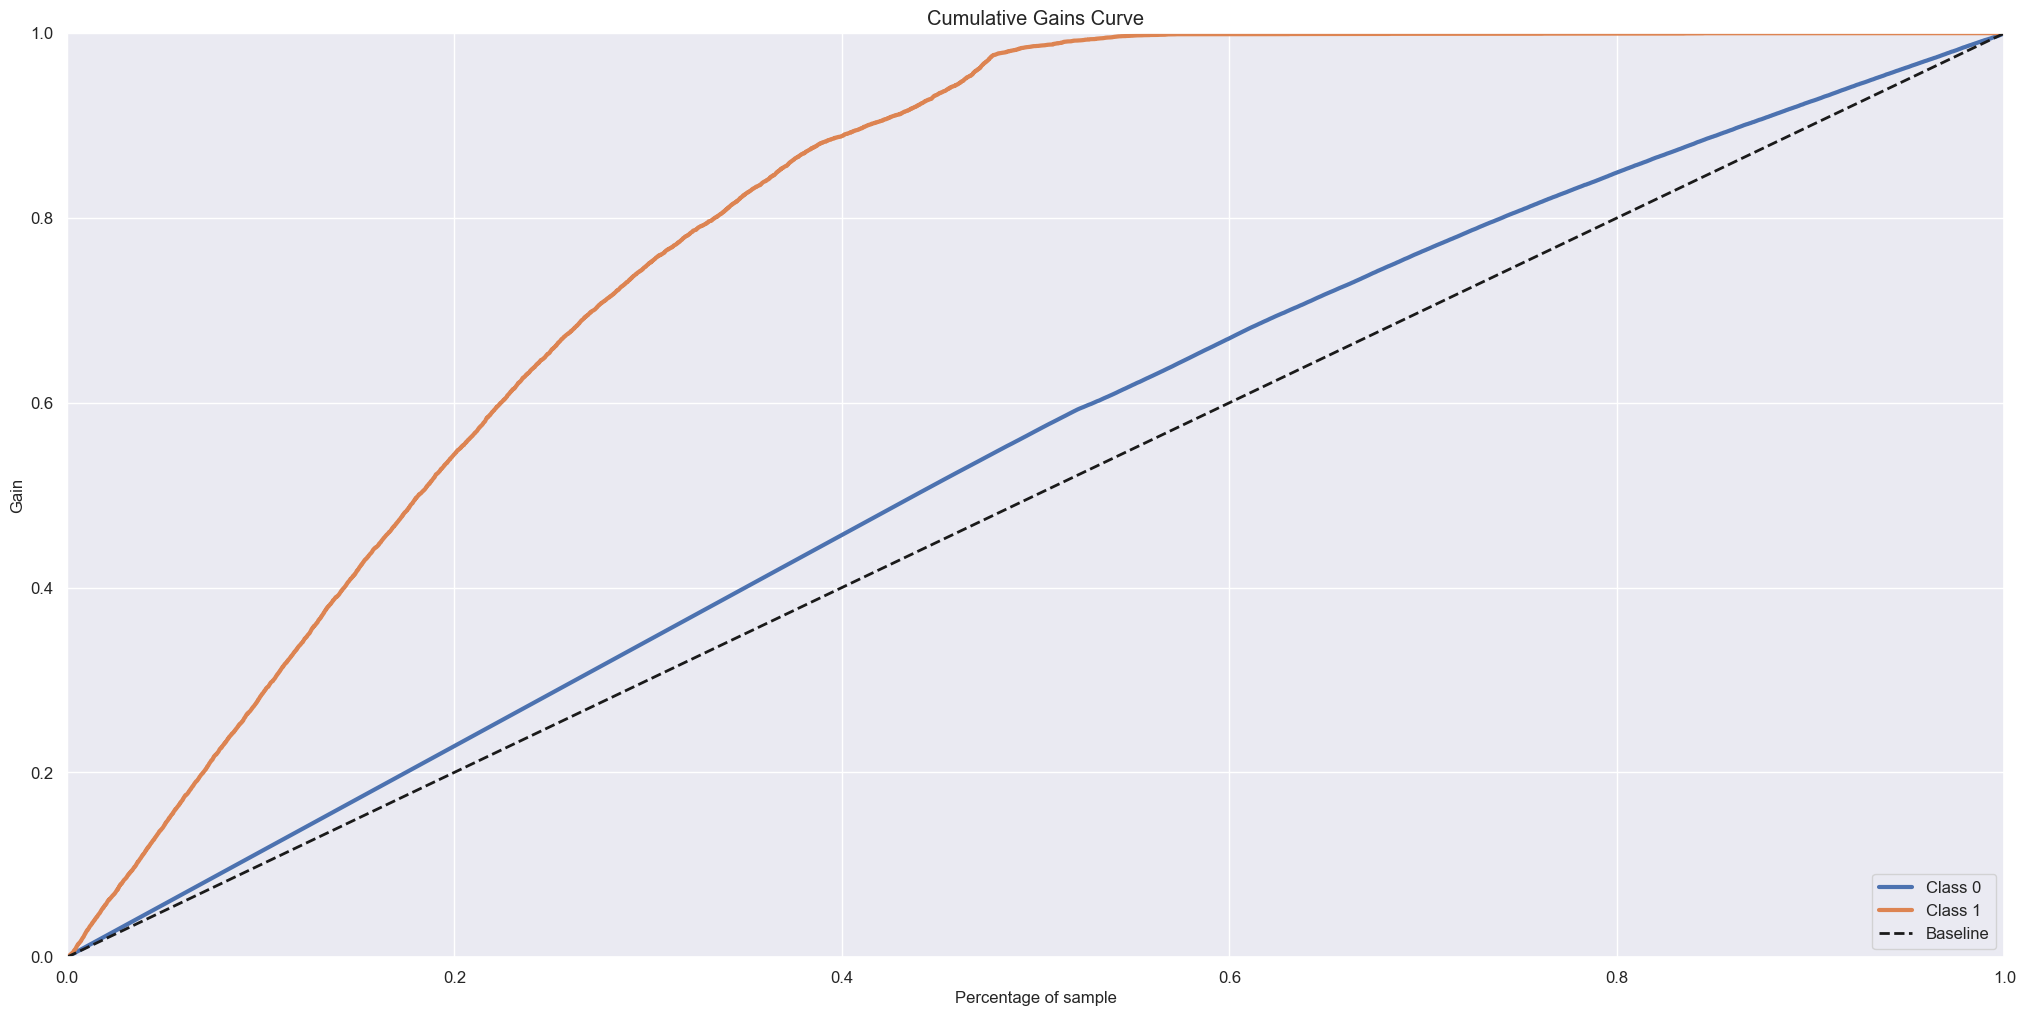

In [486]:
skplt.metrics.plot_cumulative_gain( y_test, yhat_lr );

# 8.0. Model Performance 